# Algorithms and complexity

A great variety of problems can be solved by running a **software** on a computer.
To this end, the problem must be **appropriately formulated**:
- first, you **analyze** the problem to define an **algorithm**
- then, you **implement** the algorithm using a suitable programming language to obtain a **program**

## Algorithms ##

An **algorithm** is a finite list of instructions, which specify the operations that must be performed to solve a *class* of problems.

Any particular problem in the class is determined by a set of data and can be solved executing (the program that implements) the algorithm on those data.

An algorithm must be:
- **finite**: each individual instruction must be executable in finite time and a finite number of times
- **general**: it must provide the solution for a class of problems
- **nonambiguous**: the next steps to be executed must be unambiguously defined

The three fundamental structures of an algorithm are:

<img src="images/alg_structures.png" width=800px />

Two algorithms are said to be **equivalent** when:
- they have the same input domain
- they have the same output domain
- they produce the same output when run on the same input

Beware: while two equivalent algorithms provide the same result, they may do so using very **different approaches**, and, hence, they may require very **different time and space** to run.

### Example: summing all positive integers less than $n$ ###

How would you write an algorithm that finds the sum of all positive integers less than $n$?

Probably, like this:

In [1]:
def sum_all(n):
    s = 0
    for i in range(n):
        s += i
    return s

This algorithm **iterates** the step `s += i` $n$ times. 
We can say that it takes time roughly **proportional** to $n$.

Text(0, 0.5, 'running time')

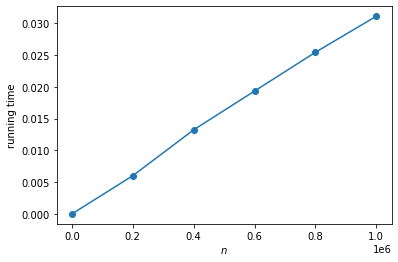

In [2]:
from time import time
import matplotlib.pyplot as plt

times = []
n_values = range(0,1000001,200000)
for n in n_values:
    these_times = []
    for _ in range(50): #repeat 100 times and take the average running time
        ts = time()
        s = sum_all(n)
        tf = time()
        these_times.append(tf-ts)
    times.append(sum(these_times)/100)
    
plt.plot(n_values, times, marker='o')
plt.xlabel('$n$')
plt.ylabel('running time')

However, we can observe that the sum
$$1+2+\cdots+(n-2)+(n-1)$$
can be rewritten as
$$\frac{(1+(n-1))+(2+(n-2))+\cdots+((n-2)+2)+((n-1)+1)}{2}=\frac{n(n-1)}{2}$$
thus we can write a better algorithm like this:

In [3]:
def smart_sum_all(n):
    return n*(n-1)/2

This algorithm makes a **constant** number of operations, regardless of $n$.
It takes (roughly) **constant time**.

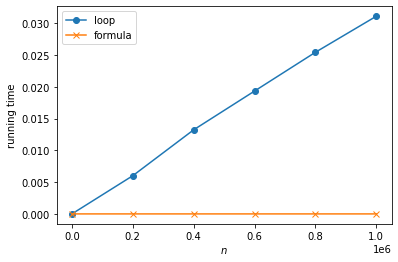

In [4]:
smart_times = []
n_values = range(0,1000001,200000)
for n in n_values:
    these_times = []
    for _ in range(50): #repeat 50 times and take the average running time
        ts = time()
        s = smart_sum_all(n)
        tf = time()
        these_times.append(tf-ts)
    smart_times.append(sum(these_times)/50)
    
plt.plot(n_values, times, marker='o', label='loop')
plt.plot(n_values, smart_times, marker='x', label='formula')
plt.xlabel('$n$')
plt.ylabel('running time')
plt.legend()

## Complexity ##

**Computational complexity** refers to the analysis of algorithms based on the **amount of resources** required for running them, **as a function of the input size** $n$.

We can consider
- **space** complexity: the amount of memory space required to solve a problem in relation to the input size
- **time** complexity: the amount of time it takes to solve a problem in relation to the input size

Time complexity is commonly estimated by counting the **number of elementary operations** performed by the algorithm, supposing that each elementary operation takes a fixed amount of time to perform.

When analyzing the complexity of an algorithm, we may refer to
- **best** case
- **average** case
- **worst** case

### Example: find the index of a value in a list using linear search ###

Linear search simply means that you go through all elements one by one, until you find the input value:

In [5]:
def linear_search(l, x):
    i = 0
    while i<len(l):
        if l[i] == x:
            return i
        else:
            i += 1
    return -1

In this case, the input size $n$ is the length of the list $l$.

- **best-case**: $x$ is the first element of the list, and that value is found in the first iteration
- **average-case**: we need to estimate the *expected* time to find $x$ when $x$ and $l$ are chosen from a probability distribution over the input domain; in this case, if $l$ is fixed, all elements of $l$ are different, and $x$ is one such element chosen uniformly at random, on average $x$ will be "in the middle" of the list, and we need roughly $n/2$ iterations
- **worst-case**: $x$ is the last element of the list (or $x$ is not even in the list), and we need $n$ iterations

Usually, when describing the time complexity of an algorithm, we are talking about the worst-case.

### Question: ###
How can we improve the search algorithm if we know that the list $l$ is **sorted**?

### Big-O Notation ###

Big-O notation, sometimes called "asymptotic notation", is a mathematical notation that describes the limiting behavior of a function when the argument tends towards a particular value or infinity.

In computer science, Big-O notation is used to **classify algorithms** according to how their running time or space requirements **grow as the input size $n$ grows**.

This notation characterizes functions according to their growth rates: different functions with the same growth rate may be represented using the same O notation.

<img src="images/bigO.png" width=900px />

## Time Complexities ##

### Constant Time — $O(1)$ ###

An algorithm is said to have a **constant time** when it is not dependent on the input data $n$.

An example is the "smart" formula for the sum of all positive integers less than $n$.

### Logarithmic Time — $O(\log n)$ ###

An algorithm is said to have a **logarithmic time** complexity when it operates in such a way to reduce the size of the input data by a constant factor in each step.

A typical example is **binary search**, a smart way to find the position of an element in a sorted list (that only looks at a *tiny* fraction of the input data):

In [6]:
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
    return -1
    
data = [1, 4, 11, 18, 24, 32, 42, 57, 71, 89]
print(binary_search(data, 44))

-1


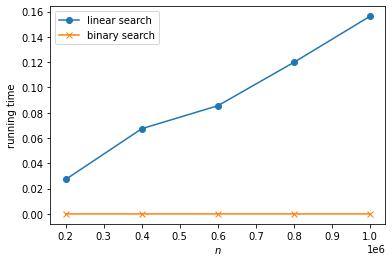

In [7]:
import numpy as np

linear_times = []
n_values = range(200000,1000001,200000)
for n in n_values:
    l = range(n)
    these_times = []
    for _ in range(50): #repeat 50 times and take the average running time
        x = np.random.randint(n)
        ts = time()
        s = linear_search(l,x)
        tf = time()
        these_times.append(tf-ts)
    linear_times.append(sum(these_times)/50)
    
binary_times = []
n_values = range(200000,1000001,200000)
for n in n_values:
    l = range(n)
    these_times = []
    for _ in range(50): #repeat 50 times and take the average running time
        x = np.random.randint(n)
        ts = time()
        s = binary_search(l,x)
        tf = time()
        these_times.append(tf-ts)
    binary_times.append(sum(these_times)/50)
    
plt.plot(n_values, linear_times, marker='o', label='linear search')
plt.plot(n_values, binary_times, marker='x', label='binary search')
plt.xlabel('$n$')
plt.ylabel('running time')
plt.legend()

### Linear Time — $O(n)$ ###

An algorithm is said to have a **linear time** complexity when the running time increases at most linearly with the size of the input data.

This is the **best possible** time complexity when the algorithm must examine **all** values in the input data.

An example is the loop-based algorithm to find the sum of all positive integers less than $n$, or the linear search algorithm.

### Quadratic Time — $O(n^2)$ ###

An algorithm is said to have a **quadratic time** complexity when it needs to perform a linear time operation **for each value** in the input data.

This typically involves a **nested iteration**.

### Example: verify whether a list contains duplicates ###

Intuitively, we need to compare each element with each other, so $n*n$ comparisons:

Text(0, 0.5, 'running time')

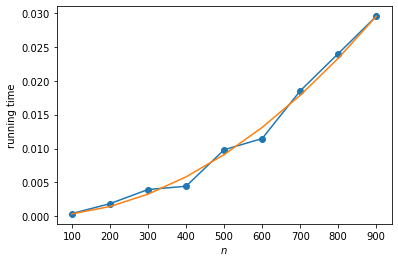

In [8]:
def find_duplicates(l):
    for i in range(len(l)):
        for j in range(len(l)):
            if i!=j and l[i] == l[j]:
                return f'duplicates found at positions {i} and {j}'
    return 'the list does not contain duplicates'

times = []
n_values = range(100,1000,100)
for n in n_values:
    these_times = []
    for _ in range(50): #repeat 50 times and take the average running time
        l = np.random.choice(n*n//10,n)
        ts = time()
        s = find_duplicates(l)
        tf = time()
        these_times.append(tf-ts)
    times.append(sum(these_times)/50)
       
plt.plot(n_values, times, marker='o')
plt.plot(n_values, [n**2*times[-1]/(n_values[-1]**2) for n in n_values])
plt.xlabel('$n$')
plt.ylabel('running time')

### Exponential Time — $O(2^n)$ ###

An algorithm is said to have an **exponential time** complexity when the running time increases by a constant factor **for each** "element" of the input data.

This typically requires $n$ **nested iterations**.

An example is a brute-force attack to guess the key of a combination lock.

## Final notes ## 

- When analyzing the time complexity of an algorithm that performs a sequence of operations, the time complexity is the **sum** of the complexity of all operations
- The Big-O notation is **asymptotic**, which means that constant factions do **not** matter
- If an algorithm performs a sequence of operations having different **asymptotic** complexities, the overall complexity of the algorithm will be the **largest** complexity among all operations
- Often, you can **trade** time for space, especially if you know that you will need to perform the same operation multiple times
- In some cases, the difference between an optimal and a naive algorithm for the same problem is **critical**; a typical example to learn this (and complexity in general) is by focusing on **sorting** algorithms

<img src="images/sorting.gif" width=900px />

---
---

# Pythonic programming

That is: things that are specific of Python, and things that you can do (and you typically do) in Python.

### Variables, pointers, mutable *vs.* immutable data types ###

Variables in Python do *not* have a type.
Everything is a variable in Python (even functions and modules).

A **variable** is actually a **pointer** to an object:
- evaluating an expression produces an object, that is, a memory space with some properties
- assigning an expression to a variable means establishing that that variable **refers** (or **points**) to the object produced by the expression

In [9]:
a = [1, 2, 3]
b = [1, 2, 3]

print(a==b)    # compares the content
print(a is b)  # checks that they refer to the same object 

True
False


<img src="images/pointer.png" width=400px />

Some objects in Python are **mutable**, meaning that, through a pointer, you can modify the object **in place**, without having to create a new object.

In [10]:
a = [1, 2, 3]
b = a          # make b point to the same object to which a points
a[1] = 5       # lists are MUTABLE: you can modify them in place
print(a)
print(b)

[1, 5, 3]
[1, 5, 3]


<img src="images/mutable.png" width=400px />

In [11]:
a = (1, 2, 3)   # this is a tuple, which is IMMUTABLE
b = a
a = a[:2]+(7,)  # we cannot modify the tuple in place, only option is creating a new tuple
print(a)
print(b)

(1, 2, 7)
(1, 2, 3)


<img src="images/immutable.png" width=400px />

Immutable data types allow Python to save memory, *when possible*:

In [12]:
# mutable: 2 different objects
l1 = [1,2,3]
l2 = [1,2,3]
id(l1), id(l2)

(139781132634560, 139780288491776)

In [13]:
# immutable: 2 pointers to the same object
t1 = 'ciao'
t2 = 'ciao'
id(t1), id(t2)

(139780287816624, 139780287816624)

**Question**: why is this possible?

When you pass a value to a function in Python you **always** pass a **reference**: functions **parameters** are **local** (i.e., only existing *in the function*) **pointers** to the object passed as an argument.

- With mutable data types (e.g., lists and dictionaries), you can modify the arguments in a way that propagates to the caller.
- With immutable data types (e.g., strings, tuples and numbers), any modification has no impact to the outer variables whatsoever 

In [14]:
def remove_last(v):
    print('Vect inside function, before:', v)
    del(v[-1])
    print('Vect inside function after:', v)

l=[1,2,3,2]
remove_last(l)
print('Vect outside function:',l)

Vect inside function, before: [1, 2, 3, 2]
Vect inside function after: [1, 2, 3]
Vect outside function: [1, 2, 3]


<img src="images/mutable_functions.png" width=400px />

In [15]:
def remove_last(v):
    print('Vect inside function, before:', v)
    v = v[:-1]    # instead of calling del, I create a new object, with a syntax that also works for immutables
    print('Vect inside function after:', v)

t=(1,2,3,2)
remove_last(t) 
print('Vect outside function:',t)

Vect inside function, before: (1, 2, 3, 2)
Vect inside function after: (1, 2, 3)
Vect outside function: (1, 2, 3, 2)


<img src="images/immutable_functions.png" width=400px />

### Catching exceptions

In Python "you ask for forgiveness, not permission":

In [16]:
x = int(input('insert an integer '))
try:           # what if x==0?
    y = 1/x
except:
    y = float('inf')
print(y)

insert an integer 0
inf


**Question**: what is an alternative way to obtain the same result?

### Conditional expressions

A synthetic way to express a conditional statement:

In [17]:
import math

def log_no_error(x):
    return math.log(x) if x > 0 else float('nan')

log_no_error(-1)

nan

### List comprehension

A concise sintax to construct a list by looping over another sequence.

In [18]:
t = 'i <3 list comprehension'
s = [c.capitalize() for c in t]
print(s)

['I', ' ', '<', '3', ' ', 'L', 'I', 'S', 'T', ' ', 'C', 'O', 'M', 'P', 'R', 'E', 'H', 'E', 'N', 'S', 'I', 'O', 'N']


In [19]:
# the same, but without list comprehension
t = 'i <3 list comprehension'
s = []
for c in t:
    s.append(c.capitalize())
print(s)

['I', ' ', '<', '3', ' ', 'L', 'I', 'S', 'T', ' ', 'C', 'O', 'M', 'P', 'R', 'E', 'H', 'E', 'N', 'S', 'I', 'O', 'N']


*Brace yourself*: a list comprehension is faster than a standard for loop!

In [20]:
import time

t = []
for i in range(10):
    st = time.time()
    s = [c*2 for c in range(100000)]
    t.append(time.time()-st)
print('average time with list comprehension:', sum(t)/10)

t = []
for i in range(10):
    st = time.time()
    s = []
    for c in range(100000):
        s.append(c*2)
    t.append(time.time()-st)
print('average time without list comprehension:', sum(t)/10)

average time with list comprehension: 0.01166067123413086
average time without list comprehension: 0.01855466365814209


You can put conditions in a list comprehension:

In [21]:
even = [i for i in range(20) if i%2==0]
even

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

You can similarly use dictionary comprehension:

In [22]:
doubles = {i:i*2 for i in range(10)}
doubles

{0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18}

### Generator expressions
There is no such thing as a "tuple comprehension".

The syntax of a list comprehension, but with round brackets, produces a **generator object**.
This object "knows" how to loop over the specified sequence, but:
- in a list comprehension all values are computed and stored in a list (thus taking memory)
- a generator expression creates an object that is ready to output the next element of the sequence upon request

The built-in function `next` extracts the next element from the generator.

In [23]:
g = (x**2 for x in range(5))
g

<generator object <genexpr> at 0x7f2122687970>

In [24]:
next(g)

0

In [25]:
next(g), next(g), next(g)

(1, 4, 9)

You can also use a **`for`** loop to iterate over the elements of a generator:

In [26]:
for val in g:
    print(val)

16


As you may have noticed, the generator keeps track of where it currently is in the sequence.
Any further request for elements (whether it be a `next` or a **`for`**) resumes from where the generator stopped when it was last used.

Once the generator is **exhausted**, an explicit call to `next` throws a **StopIteration exception**:

In [27]:
next(g)

StopIteration: 

### any and all operators

You can check whether:
- there is *at least* one `True` in a sequence of booleans, using the `any` operator
- *all* elements of a sequence of booleans are `True`, using the `all` operator

In [28]:
l = [4,5,2,7,5,6,8,3]
any(c%3==0 for c in l) # check if at least one of the elements of l is a multiple of 3 

True

In [29]:
all(c%3==0 for c in l) # check if all elements of l are multiples of 3 

False

### sets ###

A `set` is a collection of *different* elements.

You can build a set from scratch like this:

In [30]:
s = {3,4,6,2,7}
print(s)

{2, 3, 4, 6, 7}


You can *extract* the set of all *unique* elements in a sequence like this:

In [31]:
l = [1,5,2,3,5,7,5,3]
s = set(l)
print(s)

{1, 2, 3, 5, 7}


You can add elements to a set (which will be actually added only if the set does not contain those values already): 

In [32]:
s.add(6)
print(s)
s.add(3)
print(s)

{1, 2, 3, 5, 6, 7}
{1, 2, 3, 5, 6, 7}


### Shallow copy vs. Deep copy ###

Sometimes, you need to **duplicate** a mutable object, so that you can modify it while leaving the original object unchanged.
To this end, you can use the `copy` method:

In [33]:
l1 = [1,2,3,4]
l2 = l1.copy()
print(id(l1), id(l2))

139780288440640 139780288494208


However, you need to be careful when mutable objects **contain** other mutable objects:

In [34]:
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = x.copy()  # the copy method tells Python to create a copy of the object, not an alias

What you probably expected:

`x` and `y` are two entirely different objects, even though they contain identical values.

At a first sight, it looks like this is actually the case:

In [35]:
print(id(x), id(y))   # different ids
x.append(['new sublist'])  # appending something to x has no consequences on y
print(x)
print(y)

139780283884224 139780287848064
[[1, 2, 3], [4, 5, 6], [7, 8, 9], ['new sublist']]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


Yet, it is not:

In [36]:
x[1][0] = 'X'  # modifying something that was "inside" x before the copy impacts on y
print(x)
print(y)

[[1, 2, 3], ['X', 5, 6], [7, 8, 9], ['new sublist']]
[[1, 2, 3], ['X', 5, 6], [7, 8, 9]]


What happened:

When we created a copy of `x` we guaranteed that `x` and `y` refer to two **different** list objects (i.e., are **not** themselves aliases of one another).
For this reason, adding an element to the object to which `x` points has no effects on the different object to which `y` points.

However, we did **not** make a copy of each of `x`'s sublists.
This means that there exist a **single** list object `[4, 5, 6]`, with the second element of `x` and the second element of `y` being two **aliases** for that object (i.e., two different pointers to the same object).

Indeed:

In [37]:
id(x[1]), id(y[1])

(139780288228160, 139780288228160)

Since the object to which `x[1]` and `y[1]` point is mutable, if we modify it using `x[1]`, the modification is also visible from `y[1]`.

What you should have done:

In [38]:
import copy
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
z = copy.deepcopy(x)

# the method deepcopy recursively create copies of all "pieces" of its argument

id(x[0]), id(z[0])

(139780287852736, 139780289356480)

---
---

# Libraries for scientific computing and data analysis

## NumPy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional **array** object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [39]:
import numpy as np   # the pseudonym np is widely used

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the **rank** of the array; the **shape** of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists (lists of lists), and access elements using square brackets:

In [40]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [41]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [42]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [43]:
a = np.zeros((2,2))  # Create a 2x2 (2 rows, 2 columns) array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [44]:
b = np.ones((1,2))   # Create a 1x2 array of all ones
print(b)

[[1. 1.]]


In [45]:
c = np.full((2,2), 7) # Create a 2x2 constant array
print(c)

[[7 7]
 [7 7]]


In [46]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [47]:
e = np.random.random((2,2)) # Create a 2x2 array filled with random values in (0,1)
print(e)

[[0.99103025 0.54036287]
 [0.23698357 0.41120044]]


### Array indexing

Numpy offers several ways to index into arrays.

**Slicing**: similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [48]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice is a **view** into the same data, i.e., a system of pointers to the selected parts of the original object and **not** a deep-copy of those parts of the object.
Modifying the slice **will modify** the original array:

In [49]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


If you are only interested in the elements on a specific row of a rank 2 array, you have two options:
- using slices for both axes yields an array of the same rank as the original array 
- using integer indexing to select the row you want (and slices for the columns) yields an array of **lower rank**

In [50]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [51]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [52]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing**: integer array indexing allows you to construct arbitrary arrays using the data from another array. In this case you obtain a **different object**, not a view:

In [53]:
# An example of integer array indexing.
# You can read this as taking alements having coordinates [0,0], [1,1], [2,0]
b = a[[0, 1, 2], [0, 1, 0]]
c = np.array([a[0, 0], a[1, 1], a[2, 0]])
print(b)
print(c)

[1 6 9]
[1 6 9]


We can mix integer indexing with slicing:

In [54]:
# Select the subarray consisting of the intersection of
# rows 0 and 2 and columns 1 and 2
# c is the following array of shape (2, 2):
# [[ 2  3]
#  [10 11]]
c = a[[0,2], 1:3]
print(c)
# this time, c is not a view
c[0,0] = -1
print(c[0,0], a[0,1])

[[ 2  3]
 [10 11]]
-1 2


In [55]:
# When using integer array indexing, you can reuse the same element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row (or column) of a matrix:

In [56]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [57]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [58]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing**: boolean array indexing lets you pick out arbitrary elements of an array. This type of indexing is generally used to select the elements of an array based on whether some condition is satisfied or not.

In [59]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [60]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


In [61]:
# You can also use boolean indexing as in integer indexing to specify
# which rows and columns you want

print(a[[True,False,True]])  # rows 0 and 2, all columns

print(a[[True,False,True],[True,False]])  # rows 0 and 2, first column, in a rank 1 array

[[1 2]
 [5 6]]
[1 5]


### Datatypes

All elements of a numpy array must have the same type.
Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype.

In [62]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.zeros(2)  # Let numpy choose the datatype
z = np.zeros(2, dtype=np.int64)  # Force a particular datatype

print(x, x.dtype)
print(y, y.dtype)
print(z, z.dtype)

[1 2] int64
[0. 0.] float64
[0 0] int64


### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [63]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum
print(x + y)
# or
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [64]:
# Elementwise difference
print(x - y)
# or
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [65]:
# Elementwise product
print(x * y)
# or
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [66]:
# Elementwise division
print(x / y)
# or
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [67]:
# Elementwise square root
print(x**(0.5))
# or
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Matrix multiplication in numpy is implemented by the `@` operator or the `dot` function (`dot` is available both as a function in the numpy module and as a method of array objects).
You can use `@` or `dot` to:
- multiply matrices
- multiply a matrix by a vector
- compute inner products of vectors

In [68]:
# Matrix multiplication
print(x @ y)
# or
print(x.dot(y))
# or
print(np.dot(x,y))

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [69]:
v = np.array([9,10])

# Multiplication of matrix by vector
print(x @ v)
# or
print(x.dot(v))
# or
print(np.dot(x, v))

# Multiplication of vector by matrix
print(v @ y)
# or
print(v.dot(y))
# or
print(np.dot(v, y))

[29. 67.]
[29. 67.]
[29. 67.]
[115. 134.]
[115. 134.]
[115. 134.]


In [70]:
# There is no difference in numpy between row-vectors and column-vectors
print(v, v.shape, v.T, (v.T).shape) # .T is the transposition
print(x @ v.T)  
print(v.T @ y)

[ 9 10] (2,) [ 9 10] (2,)
[29. 67.]
[115. 134.]


In [71]:
w = np.array([11, 12])

# Inner product of vectors
print(v @ w)
# or
print(v.dot(w.T))
# or
print(np.dot(v.T, w))

219
219
219


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [72]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations.
Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix.
We could do it like this:

In [73]:
# We will add the vector v to each row of the matrix x, storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v  # y[i, :] means i-th row, all columns

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


When the matrix `x` is very large, computing an **explicit loop** in Python could be **slow**.

Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`.
We could implement this approach like this:

In [74]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [75]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`.
Consider this version, using broadcasting:

In [76]:
# We will add the vector v to each row of the matrix x, storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` thanks to numpy's **broadcasting**.

Basically, numpy tries to replicate `v` along the missing dimension to make the two shapes "compatible".

In some cases, however, broadcasting is impossible:

In [77]:
# not compatible because t and v have different size along their unique dimension
t = np.array([1,2])
v+t

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [78]:
# not compatible because w and x have different size along their common dimension
w = np.array([1, 0, 1, 0])
y = x + w
print(y)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [79]:
# compatible because now w is a matrix with 4 rows and 1 column
w = np.array([1, 0, 1, 0]).reshape(4,1)
print(w)
y = x + w
print(y)

[[1]
 [0]
 [1]
 [0]]
[[ 2  3  4]
 [ 4  5  6]
 [ 8  9 10]
 [10 11 12]]


Broadcasting typically makes your code more concise and **significantly faster**, so you should strive to use it where possible.

## Matplotlib

Matplotlib is a plotting library.

In particular, we will focus on the `matplotlib.pyplot` module.

In [80]:
import matplotlib.pyplot as plt

### Plotting

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data.
`plot` wants two vectors of identical length that respectively contain the x-coordinates and the y-coordinates of a set of points in the plane.
`plot` automatically joins these points with a curve.

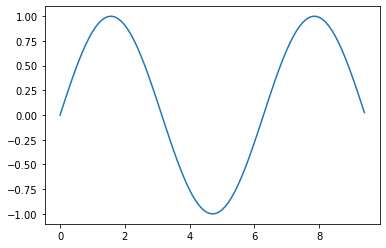

In [81]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)  # apply a function to all x-coordinates to obtain the y-coordinates

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

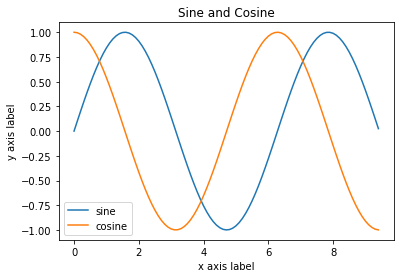

In [82]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label='sine')
plt.plot(x, y_cos, label='cosine')
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend()

### Subplots 

You can have multiple subplots into the same figure using the `subplot` function.

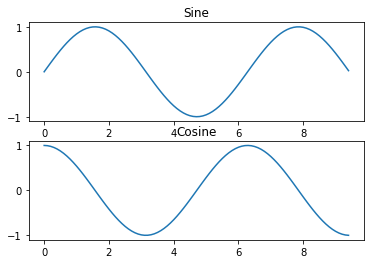

In [83]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

Alternatively, you can gain access to individual axes and plot on those axes.

Figure(432x288)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f212265e2e0>


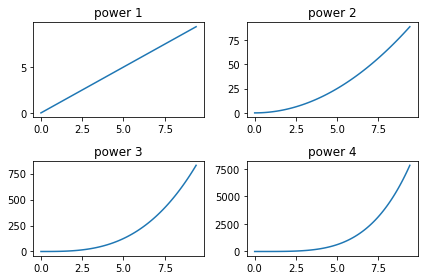

In [84]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)

# Set up a subplot grid that has height 2 and width 2
fig,axes = plt.subplots(2,2)
print(fig)
print(axes)

# Make a different plot on each axis
for i,ax in enumerate(axes.flat):  #.flat flattens the rank 2 array onto a rank 1 array
    y = x**(i+1)
    ax.plot(x, y)
    ax.set_title(f'power {i+1}')
    
plt.tight_layout() # this adds space between the subplots to make the titles readable

# Show the figure.
plt.show()

## Pandas

The pandas package is the backbone of most data science projects in Python.
It is based on the concept of **DataFrame**, a two-dimensional data structure where data is aligned in a tabular fashion in rows and columns.
Pandas' DataFrames implement many functions that allow you to "easily" clean, transform and analyze your data.

For instance, you can:
- Calculate statistics and answer questions about the data, like
    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C looks like?

- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria

- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 

- Store the cleaned, transformed data back into a CSV, other file or database

We will see pandas in action in the following lectures. For the moment, let us introduce its main data structures and see how data can be read and written.

To use Pandas you first need to import it:

In [85]:
import pandas as pd

In [86]:
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


### Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

<img src="images/series-and-dataframe.png" width=600px />

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

### Creating DataFrames from scratch

There are *many* ways to create a DataFrame from scratch, but a great option is to just use a simple `dict`. 

Let us say we have a fruit stand that sells apples and oranges.
We have had 4 customers who purchased apples and oranges as follows:

In [107]:
my_purchases = {'June':{'apples':3}, # this customer did not buy any oranges
             'Robert':{'apples':2, 'oranges':3},
             'Lily':{'oranges':7},
             'David':{'oranges':2, 'apples':1}}

In [108]:
my_purchases['June']

{'apples': 3}

In [109]:
my_purchases['June']['apples']

3

We want a table with a column for each fruit and a row for each customer purchase.
We first reorganize the dictionary of purchases as follows:

In [110]:
reorganized_purchases = {'apples':[], 'oranges':[]}
for customer,purchase in my_purchases.items():
    for fruit in reorganized_purchases.keys():
        quantity = purchase.get(fruit,0) # this returns 0 if that key is not in purchase
        reorganized_purchases[fruit].append(quantity)
print(reorganized_purchases)

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}


And then pass it to the pandas DataFrame constructor:

In [111]:
purchases = pd.DataFrame(reorganized_purchases)

purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

In [112]:
purchases['name'] = my_purchases.keys()
purchases

apples  oranges    name
0       3        0    June
1       2        3  Robert
2       0        7    Lily
3       1        2   David

In [113]:
purchases.to_csv('my_purchases.csv')

In [114]:
!cat my_purchases.csv

,apples,oranges,name
0,3,0,June
1,2,3,Robert
2,0,7,Lily
3,1,2,David


The **Index** of this DataFrame is by default the integer range 0-3, but we can specify that we want to use our customer names: 

In [115]:
purchases = pd.DataFrame(reorganized_purchases, index=my_purchases.keys())

purchases

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

In [116]:
purchases['oranges'].max()

7

In [117]:
purchases['oranges'].argmax()

2

In [118]:
purchases.index[2]

'Lily'

In [119]:
purchases['oranges'].idxmax()

'Lily'

In [120]:
purchases.iloc[purchases['oranges'].argmax()]

apples     0
oranges    7
Name: Lily, dtype: int64

To **locate** a customer's purchase we can use the `loc` or `iloc` methods:

In [121]:
purchases

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

In [122]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

In [123]:
purchases.iloc[2]

apples     0
oranges    7
Name: Lily, dtype: int64

### Reading data from CSVs

With CSV files all you need is a single line to load in the data:

In [124]:
df = pd.read_csv('purchases.csv')

df

Unnamed: 0  apples  oranges
0       June       3        0
1     Robert       2        3
2       Lily       0        7
3      David       1        2

CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [125]:
df = pd.read_csv('purchases.csv', index_col=0)

df

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

You can write the CSV back like this:

In [126]:
df.to_csv('new_purchases.csv')

### Reading data from JSON

A JSON file is essentially a stored Python `dict`:

In [127]:
!cat purchases.json

{"apples":{"June":3,"Robert":2,"Lily":0,"David":1},"oranges":{"June":0,"Robert":3,"Lily":7,"David":2}}

You can read it equally easily:

In [128]:
df = pd.read_json('purchases.json')

df

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

Pandas will try to figure out how to create a DataFrame by analyzing the structure of your JSON.

Be careful: it might not get it right!

You can write the JSON back like this:

In [129]:
df.to_json('new_purchases.json')

## SciPy and Scikit-learn

**SciPy** is the reference Python library for scientific computing, technical computing and statistics.
It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

**Scikit-learn** (aka sklearn) is the most known library for machine learning in Python.
It features various classification, regression and clustering algorithms including:
- support-vector machines
- random forests
- gradient boosting
- k-means
- DBSCAN

It is designed to interoperate with both NumPy and SciPy.

To illustrate some of the instruments that these two libraries provide, let us consider the following analysis of the scores obtained by 30 students at an exam.

We first load and visualize the data:

In [131]:
data = pd.read_csv('scores.csv')
data

id  hours      score
0   194495    0.5  16.620517
1   192949    0.9  19.861295
2   198095    1.2  18.887393
3   182192    2.6  16.230042
4   188512    3.4  19.311403
5   182569    3.5  18.915873
6   194398    3.6  19.843228
7   196597    3.7  21.675923
8   204071    4.0  19.066709
9   195170    4.1  20.670995
10  208783    4.2  19.871047
11  188250    4.3  23.971143
12  183032    4.6  21.270023
13  185115    5.0  20.699563
14  192755    5.0  22.138052
15  188119    5.3  21.831794
16  200254    5.4  23.915345
17  192443    5.5  25.700285
18  200727    5.6  26.836553
19  187576    6.3  22.607182
20  183873    7.4  25.913126
21  180104    7.6  26.521857
22  209900    7.7  23.668582
23  207090    7.9  27.031764
24  196190    8.6  28.155629
25  206551    8.8  29.022063
26  195281    9.2  25.265343
27  180749    9.4  27.152048
28  192775    9.6  26.522625
29  190079    9.8  26.033771

We then check if the scores follow a Gaussian distribution:

Text(0.5, 1.0, 'Fit results: mu = 22.84,  std = 3.48')

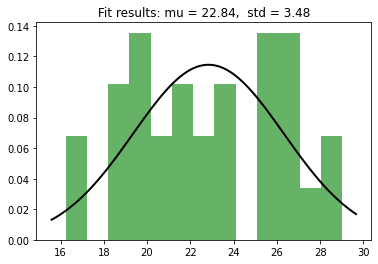

In [132]:
import matplotlib.pyplot as plt
# import the class norm (normal distribution)
from scipy.stats import norm
# find the normal distribution that best fits our scores 
mu, std = norm.fit(data['score'])
# plot the histogram of our scores
plt.hist(data['score'], bins=int(data['score'].max()-data['score'].min())+1, density=True, alpha=0.6, color='g')
# plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()  # get the min x and y of our data
x = np.linspace(xmin, xmax, 100)  # define a sequence of values from xmin to xmax
p = norm.pdf(x, mu, std)  # get the pdf for all values in the range
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)

The histogram does not look Gaussian. Let us try with a Gaussian KDE (a linear combination of Gaussians):

Text(0.5, 1.0, 'Fit with KDE')

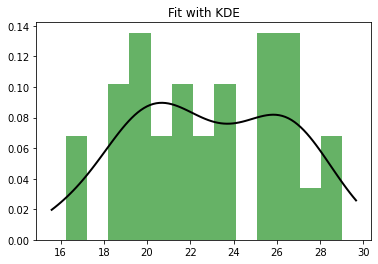

In [133]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(data['score'])  # fit the KDE
# plot the histogram of our scores
plt.hist(data['score'], bins=int(data['score'].max()-data['score'].min())+1, density=True, alpha=0.6, color='g')
# plot the PDF of the fitted KDE
xmin, xmax = plt.xlim()  # get the min x and y of our data
x = np.linspace(xmin, xmax, 100)  # define a sequence of values from xmin to xmax
p = kde(x)  # get the pdf for all values in the range
plt.plot(x, p, 'k', linewidth=2)
title = "Fit with KDE"
plt.title(title)

Our dataset also includes the number of hours each student spent studying for this exam.
Let us verify whether the exam score grows linearly with the number of studying hours.

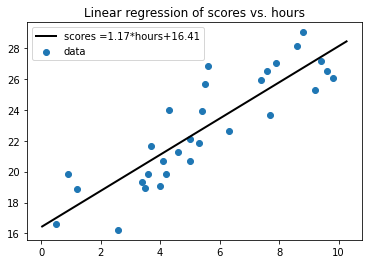

In [134]:
# import the class LinearRegression that allows to fit the data with a linear model 
from sklearn.linear_model import LinearRegression
# fit the linear model to the data (it wants a rank 2 array as first argument)
lr = LinearRegression().fit(data['hours'].to_numpy().reshape(-1,1),data['score'])
# plot the data
plt.scatter(data['hours'],data['score'], label='data')
# plot the linear regression
xmin, xmax = plt.xlim()  # get the min x and y of our data
x = np.linspace(xmin, xmax, 100)  # define a sequence of values from xmin to xmax
p = lr.predict(x.reshape(-1,1))  # get the predicted score for all values in the range
m, q = lr.coef_[0], lr.intercept_  # extract the coefficients of the liner regression
plt.plot(x, p, 'k', linewidth=2, label=f'scores ={m:.2f}*hours+{q:.2f}')
title = "Linear regression of scores vs. hours"
plt.title(title)
plt.legend()

It looks like studying actually helps.

---
---

# Cleaning data with Pandas

## **Case Study: Retail Store**

The original dataset is available [here](https://www.kaggle.com/datasets/marian447/retail-store-sales-transactions), we are going to use a slightly modified version of it.

**About the dataset**

Detailed data on sales of consumer goods obtained by ‘scanning’ the bar codes for individual products at electronic points of sale in a retail store. The data provide detailed information about quantities, characteristics and values of goods sold as well as their prices.

The anonymized dataset includes 64.682 transactions of 5.242 "Stock Keeping Units" (SKUs) sold to 22.625 customers during one year.

**Dataset Description**

1. Date of Sales Transaction
2. Customer ID
3. Transaction ID
4. SKU Category ID
5. SKU ID
6. Quantity Sold
7. Sales Amount (Unit price times quantity. For unit price, please divide Sales Amount by Quantity.)
8. Hour
9. Transaction Type (Credit card or cash)
10. Branch Name

**Data Format**

The dataset is stored in a CSV file, that is data are organized in rows and columns. CSV stays for "Comma Separated Values": each columns is separated by a comma and each row is separated by a newline character.

### **The Dataset**

* **Q1:** How is the CSV file formatted?

* **Q2:** How are columns and rows organized in the file?

In [136]:
# Let's have a look at the dataset, that is the CSV file we got.
#
# Before deciding how to import data and work with them, we take a 
# first look to the dataset by printing the first lines of the file.
#
# Once we have an idea of the content we can decide how to import it.

N = 5
with open("Retail_Store.csv", "r") as f:
    for i in range(N):
        line = f.readline().strip()
        print(line)

# ** NOTE **
# 
# The strip() method removes any leading (spaces at the beginning) 
# and trailing (spaces at the end) characters (space is the default 
# leading character to remove). The new line character is considered 
# a space character, thus it is removed.
# 
# Syntax
#
#   string.strip(characters)
#
# ** NOTE **


,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card,Circleville Store
2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card,Circleville Store
3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card,Circleville Store
4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,16,Cash,Circleville Store


### **Importing Data**

* **Q1:** How do we import the dataset in our notebook? Do you have any suggestion?

* **Q2:** How many columns does the CSV file contain?

* **Q3:** How many columns do we expect to find in our dataset?












In [137]:
import pandas as pd

In [138]:
#
# * We can use pandas to import our dataset.
#
# * The CSV file contains 11 columns, but our dataset is supposed to have only 10 columns.
#   The first column is actually the row id.  
#

# The columns in the CSV file are:
#
#     ,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
#
# What is the name of the first column?
#
#
# We can override the header (header=0) and specify the name of each column
#

df = pd.read_csv("Retail_Store.csv", 
                 names=[ "Row_ID", "Date", "Customer_ID", "Transaction_ID", 
                         "SKU_Category", "SKU", "Quantity", "Sales_Amount", 
                         "Hour", "Transaction_Type", "Branch_Name" ], 
                 header=0)
df.head(3)

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0       1  02/01/2016         2547               1          X52  0EM7L   
1       2  02/01/2016          822               2          2ML  68BRQ   
2       3  02/01/2016         3686               3          0H2  CZUZX   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store

### **Or we use the header of the CSV file**

In [139]:
# The header of the CSV file does not contain the name of the first column, the field is empty.
# If we use the header of the file to import the dataset, we get the following dataframe.

df = pd.read_csv("Retail_Store.csv")
df.head(3)

#
# pandase named as "Unnamed: 0" the first column because the field was empty
#

Unnamed: 0        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0           1  02/01/2016         2547               1          X52  0EM7L   
1           2  02/01/2016          822               2          2ML  68BRQ   
2           3  02/01/2016         3686               3          0H2  CZUZX   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store

In [140]:
# We can rename the "Unnamed: 0" column

df.rename(columns={"Unnamed: 0": "Row_ID"}, inplace=True)

# Finally we have our dataset ready to be processed 

df.head()

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0       1  02/01/2016         2547               1          X52  0EM7L   
1       2  02/01/2016          822               2          2ML  68BRQ   
2       3  02/01/2016         3686               3          0H2  CZUZX   
3       4  02/01/2016         3719               4          0H2  549KK   
4       5  02/01/2016         9200               5          0H2  K8EHH   

   Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
0       1.0          3.13    11             Card  Circleville Store  
1       1.0          5.46    18             Card  Circleville Store  
2       1.0          6.35    17             Card  Circleville Store  
3       1.0          5.59    16             Cash  Circleville Store  
4       1.0          6.88    17             Cash  Circleville Store

In [141]:
df.shape

(131708, 11)

## **Checking the dataset**

* **Q1:** Does the dataframe contain null values (missing values)?

* **Q2:** Does the dataframe contain duplicated rows?




### Missing Values

In [142]:
# Null values

df.isna().sum()

# ** NOTE ** 
#
# isna()
#     Return a boolean same-sized object indicating if the values are NA. 
#     NA values gets mapped to True values.
#
#     The result of isna() is a dataframe in which each cell contains 
#     values True or False.
#
# ** NOTE **

Row_ID              0
Date                0
Customer_ID         0
Transaction_ID      0
SKU_Category        0
SKU                 0
Quantity            0
Sales_Amount        0
Hour                0
Transaction_Type    1
Branch_Name         0
dtype: int64

#### The dataframe has 1 missing value in the *Transaction_Type* column.

* **Q1:** How do we locate the cell containing the missing value?

In [143]:
#
# We select all rows containing a NA value. 
#

df[ df['Transaction_Type'].isna() ]

# We can use the following command to obtain the same result
#
# df[df.isna().any(axis=1)]
#
# ** NOTE ** 
#
# any()
#     Return whether any element is True, potentially over an axis.
#
#     axis=1
#         Indicate which axis or axes should be reduced.
#         0 / ‘index’   : reduce the index, return a Series whose 
#         index is the original column labels.
#         1 / ‘columns’ : reduce the columns, return a Series whose 
#         index is the original index.
#
#     We set axis=1 to get the result for each row.    
#
# ** NOTE **
#

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
20      19  02/01/2016         6453              14          N8U  4A2M0   

    Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
20       1.0          7.02     8              NaN  Circleville Store

The coordinates of the cell are:
- row: 20
- column: Transaction_Type

In [144]:
#
# We modify the value of the cell containing the missing value.
#     row:     20
#     column:  Transaction_Type
#

print( f"Before the update: {df.loc[20, 'Transaction_Type']}" )

df.loc[20, 'Transaction_Type'] = 'Cash'

print( f"After the update: {df.loc[20, 'Transaction_Type']}" )

Before the update: nan
After the update: Cash


In [145]:
# Null values

df.isna().sum()

Row_ID              0
Date                0
Customer_ID         0
Transaction_ID      0
SKU_Category        0
SKU                 0
Quantity            0
Sales_Amount        0
Hour                0
Transaction_Type    0
Branch_Name         0
dtype: int64

There are no missing values in the dataframe.

### Duplicated Rows

In [146]:
# Duplicated rows

df.duplicated().sum()

1

#### The dataframe has 1 duplicated row.

* **Q1:** How do we locate the duplicated row?

In [147]:
#
# We select all duplicated rows
#

df[ df.duplicated() ]

Row_ID        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
19      19  02/01/2016         6450              14          N8U  4A2M0   

    Quantity  Sales_Amount  Hour Transaction_Type        Branch_Name  
19       1.0          7.02     8             Cash  Circleville Store

In [148]:
# We remove the duplicated rows

df.drop([19], axis=0, inplace=True )

# ** NOTE **
#
# axis:  {0 or ‘index’, 1 or ‘columns’}, default 0
#     Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#         0 we drop rows
#         1 we drop columns
#
# ** NOTE **

In [149]:
# Duplicated rows

df.duplicated().sum()

0

The dataframe has no duplicated rows or missing values.


### **Rows and Columns**

* **Q1:** How many rows and columns does the dataframe have?

In [150]:
# Check the size of the dataframe

print(f"{df.shape}\n")

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

(131707, 11)

Rows: 131707
Columns: 11


### **Cleaning Up**

* **Q1:** Do we need all columns? 

* **Q2:** There are columns that we can drop?

In [151]:
list(df.columns)

['Row_ID',
 'Date',
 'Customer_ID',
 'Transaction_ID',
 'SKU_Category',
 'SKU',
 'Quantity',
 'Sales_Amount',
 'Hour',
 'Transaction_Type',
 'Branch_Name']

* **Q1:** How many different values does the column 'Branch_Name' contains?

In [152]:
df['Quantity'].nunique()


83

In [153]:
df['Branch_Name'].nunique()

# ** NOTE **
#
# DataFrame.nunique()
#   Count number of distinct elements in specified axis
#
# ** NOTE **

1

We have only one Branch.

* **Q1:** Does the column contain useful data for the analysis? Why?

In [155]:
#
# We drop 'Row_ID' and 'Branch_Name'
#

df.drop(['Row_ID','Branch_Name'], axis=1, inplace=True)

# ** NOTE **
#
# axis:  {0 or ‘index’, 1 or ‘columns’}, default 0
#     Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#         0 we drop rows
#         1 we drop columns
#
# ** NOTE **

In [156]:
df.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0  02/01/2016         2547               1          X52  0EM7L       1.0   
1  02/01/2016          822               2          2ML  68BRQ       1.0   
2  02/01/2016         3686               3          0H2  CZUZX       1.0   
3  02/01/2016         3719               4          0H2  549KK       1.0   
4  02/01/2016         9200               5          0H2  K8EHH       1.0   

   Sales_Amount  Hour Transaction_Type  
0          3.13    11             Card  
1          5.46    18             Card  
2          6.35    17             Card  
3          5.59    16             Cash  
4          6.88    17             Cash

In [157]:
df.shape

(131707, 9)

In [158]:
# Check the size of the dataframe

print(f"{df.shape}\n")

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

(131707, 9)

Rows: 131707
Columns: 9


### **Checking Data Types**

When you load data into pandas the system assign a data type to each column.

In [159]:
#
# dtypes gives as output the data type of each column
#

df.dtypes

Date                 object
Customer_ID           int64
Transaction_ID        int64
SKU_Category         object
SKU                  object
Quantity            float64
Sales_Amount        float64
Hour                  int64
Transaction_Type     object
dtype: object

* **Q1:** Do we need to change any of them?

> The ***object*** data type is used to handle text or mixed numeric and non-numeric values

In [160]:
# Let's change the Date column, we set it to DateTime.

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

<ipython-input-160-64f0326b0465>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Date                datetime64[ns]
Customer_ID                  int64
Transaction_ID               int64
SKU_Category                object
SKU                         object
Quantity                   float64
Sales_Amount               float64
Hour                         int64
Transaction_Type            object
dtype: object

In [161]:
df.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0 2016-02-01         2547               1          X52  0EM7L       1.0   
1 2016-02-01          822               2          2ML  68BRQ       1.0   
2 2016-02-01         3686               3          0H2  CZUZX       1.0   
3 2016-02-01         3719               4          0H2  549KK       1.0   
4 2016-02-01         9200               5          0H2  K8EHH       1.0   

   Sales_Amount  Hour Transaction_Type  
0          3.13    11             Card  
1          5.46    18             Card  
2          6.35    17             Card  
3          5.59    16             Cash  
4          6.88    17             Cash

## **Checking Dataset**

We know that "*the dataset includes 64.682 transactions of 5.242 SKU's sold to 22.625 customers during one year*". 

* **Q1:** How do we check the following information?

    * 64.682 transactions
    
    * 5.242 SKU

    * 22.625 customers

    * 1 year of data




In [162]:
# Number of transactions
print(f"Transactions: {df['Transaction_ID'].nunique()} (64.682) ")

# Number of SKU
print(f"SKU: {df['SKU'].nunique()} (5.242)")

# Number of Customers
print(f"Customers: {df['Customer_ID'].nunique()} (22.625)")

# ** NOTE **
#
# DataFrame.nunique()
#   Count number of distinct elements in specified axis
#
# ** NOTE **


Transactions: 64682 (64.682) 
SKU: 5242 (5.242)
Customers: 22625 (22.625)


* **Q1:** How do we check that there are 1 year of data?

In [163]:
# 1 year of data

df.sort_values(by=['Date'])

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
10005  2016-01-02         7624            4850          BZU  AB7EN       1.0   
10095  2016-01-02         7230            4883          MOE  FE0QB       1.0   
10094  2016-01-02         4909            4882          6BZ  3YDVF       1.0   
10093  2016-01-02         3489            4881          8HU  20XCP       1.0   
10092  2016-01-02         3489            4881          V9H  QH0C9       1.0   
...           ...          ...             ...          ...    ...       ...   
131584 2016-12-31        16860           64622          Q4N  MRE4J       1.0   
131585 2016-12-31        16860           64622          R6E  V6P7N       1.0   
131586 2016-12-31        16860           64622          R6E  F90L2       1.0   
131577 2016-12-31        16975           64615          R6E  VLPE5       1.0   
131707 2016-12-31        20543           64682          XG4  V0O35       1.0   

        Sales_Amount  Hour Transaction_Type  
10005           3.63    10             Card  
10095           6.57    19             Card  
10094          31.77    19             Card  
10093          15.83    14             Card  
10092         146.02    14             Card  
...              ...   ...              ...  
131584          3.41    19             Cash  
131585          2.13    19             Cash  
131586          2.49    19             Cash  
131577          8.46    18             Cash  
131707          5.19    16             Card  

[131707 rows x 9 columns]

In [164]:
# 1 year of data

print(df["Date"].min())
print(df["Date"].max())

print("\nLength of our time series")
print(df["Date"].max()-df["Date"].min())


2016-01-02 00:00:00
2016-12-31 00:00:00

Length of our time series
364 days 00:00:00


Indeed there is 1 year of data, beginning on 2016-01-02 and ending on 2016-12-31, almost a full Calendar year.

 * 2016 was a leap year (366 days), thus the length of our time series is 364 days instead of 363, because dates starts on 2016-01-02 instead of on 2016-01-01.

 ### **How many dates?** 
 
 * **Q1:** How do we check if we have at least a transaction for each day of the year?
 
     * If we have a transaction for each day, we should have 365 dates
  
* **Q2:** How do we count the number of different dates in the dataframe?

In [165]:
# Let's count the number of dates in our dataset

df['Date'].nunique()

363

#### There are 363 dates, so 2 dates are missing. 

* **Q1** How do we find the 2 missing dates?

In [166]:
#
# We check which are the missing values (dates) in our dataframe
#

pd.date_range(start = '2016-01-02', end = '2016-12-31' ).difference(df['Date'])

DatetimeIndex(['2016-03-27', '2016-12-25'], dtype='datetime64[ns]', freq=None)

The 2 missing dates are: 

* 2016-03-27 (*Easter*)

* 2016-12-25 (*Christmas Day*)

There is actually another date that is missing:

* 2016-01-01 (*New Year's Day*)

### **Checking Dataset**

There are few constraints that must hold:

* **Transaction & Customer:** For each transcation ('Transaction_ID') we have only one customer ('Customer_ID')

* **Transaction & Hour:** For each transcation ('Transaction_ID') we have only one hour ('Hour')

* **Transaction & Transaction Type:** For each transcation ('Transaction_ID') we have only one transaction type ('Transaction Type')

* **Transaction & Date:** For each transcation ('Transaction_ID') we have only one date ('Date')

#### **Q1:** How do we check if the constraints hold?

In [167]:
# Transaction & Customer

df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
18 2016-02-01         6450              14          N8U  4A2M0       1.0   
20 2016-02-01         6453              14          N8U  4A2M0       1.0   

    Sales_Amount  Hour Transaction_Type  
18          7.02     8             Cash  
20          7.02     8             Cash

In [168]:
df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique')

0         1
1         1
2         1
3         1
4         1
         ..
131703    1
131704    1
131705    1
131706    1
131707    1
Name: Customer_ID, Length: 131707, dtype: int64

* We found a transaction assigned to two different customers!

    * We should modify the dataframe to correct the data.

In [169]:
# If we assign the same Customer_ID to both rows we create 
# a duplicate. We remove the second row.

df.drop([20], axis=0, inplace=True)

In [170]:
# Transaction & Customer

df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

The dataframe is empty, thus we do not have multiple customers associeted with the same transaction.

In [171]:
# Let's understand the meaning of the following code.
#
# ---> df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]
#

# 1. We create groups of rows based on the value of 'Transaction_ID'

transactionCustomer = df.groupby(["Transaction_ID"])

#    In the following we show the groups: the dictionary contains 
#    the group name and the list of rows beloging to it.
#    { group_name: [row_1, row_2, ...], ... } 

transactionCustomer.groups

{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5], 7: [6, 7], 8: [8], 9: [9, 10], 10: [11, 12], 11: [13], 12: [14, 15], 13: [16, 17], 14: [18], 15: [21, 22], 16: [23, 24], 17: [25, 26], 18: [27], 19: [28, 29, 30], 20: [31], 21: [32, 33], 22: [34], 23: [35, 36, 37, 38], 24: [39], 25: [40, 41, 42], 26: [43, 44], 27: [45], 28: [46], 29: [47], 30: [48], 31: [49, 50], 32: [51], 33: [52], 34: [53, 54], 35: [55, 56], 36: [57, 58], 37: [59, 60], 38: [61], 39: [62, 63, 64], 40: [65, 66, 67], 41: [68], 42: [69], 43: [70], 44: [71], 45: [72], 46: [73, 74], 47: [75, 76, 77], 48: [78, 79, 80], 49: [81], 50: [82], 51: [83], 52: [84], 53: [85], 54: [86, 87], 55: [88, 89, 90, 91], 56: [92], 57: [93, 94], 58: [95, 96], 59: [97], 60: [98], 61: [99], 62: [100], 63: [101, 102, 103, 104, 105], 64: [106, 107, 108, 109], 65: [110, 111, 112], 66: [113, 114, 115], 67: [116], 68: [117, 118], 69: [119], 70: [120], 71: [121, 122], 72: [123], 73: [124], 74: [125], 75: [126], 76: [127, 128, 129, 130, 131, 132, 133, 1

In [172]:
# Let's see which are the rows inside group 7.

transactionCustomer.get_group(7)

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
6 2016-02-01         1666               7          XG4  AHAE7       1.0   
7 2016-02-01         1666               7          FEW  AHZNS       1.0   

   Sales_Amount  Hour Transaction_Type  
6          3.65    17             Card  
7          8.21    17             Card

In [173]:
# 2. We count the number of unique Customer_ID inside each group.
#
#    If the constraint 1 Transaction 1 Customer holds, we should have 
#    a unique Customer_ID in each group, i.e. all Customer_ID in a group 
#    should coincide, or we can say that all Customer_ID in a group are duplicates.    

# ** NOTE **
#
#    transform(func)
#        The transform method applies the function func to each group.
#
# ** NOTE **

#    With gt() we check which group has more than 1 unique value, i.e.
#    more than a single customer associeted to the transaction.

transactionCustomer["Customer_ID"].transform('nunique').gt(1)


0         False
1         False
2         False
3         False
4         False
          ...  
131703    False
131704    False
131705    False
131706    False
131707    False
Name: Customer_ID, Length: 131706, dtype: bool

In [174]:
# 3. Finally we use our condition to select the row of the dataframe

df[ transactionCustomer["Customer_ID"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

An empty dataframe means that there are no groups with different rows, or multiple customers associated with the same transaction.

To verify all other constraints we can apply the same procedure.

In [175]:
# Transaction & Hour

df[ df.groupby(["Transaction_ID"])["Hour"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

In [176]:
# Transaction & Transaction Type

df[ df.groupby(["Transaction_ID"])["Transaction_Type"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []

In [177]:
# Transaction & Date

df[ df.groupby(["Transaction_ID"])["Date"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, Hour, Transaction_Type]
Index: []